In [1]:
from smc import SMC
import json
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
import altair as alt

In [2]:
with open('/Users/aliseyfi/Documents/UBC/Semester3/Probabilistic-Programming/HW/Probabilistic-Programming/Assignment_6/programs/{}.json'.format(1),'r') as f:
    exp = json.load(f)

program_1 = {'logZ' : [],
             'particles' : []}
for particle_counts in [10**i for i in range(6)]:
    print('particle counts', particle_counts)
    logZ, particles = SMC(particle_counts, exp)
    program_1['logZ'].append(logZ)
    program_1['particles'].append(particles)

particle counts 1
In SMC step 0, Zs:  []
particle counts 10
In SMC step 0, Zs:  []
particle counts 100
In SMC step 0, Zs:  []
particle counts 1000
In SMC step 0, Zs:  []
particle counts 10000
In SMC step 0, Zs:  []
particle counts 100000
In SMC step 0, Zs:  []


In [5]:
program_1['logZ']

[[], [], [], [], [], []]

ZeroDivisionError: integer division or modulo by zero

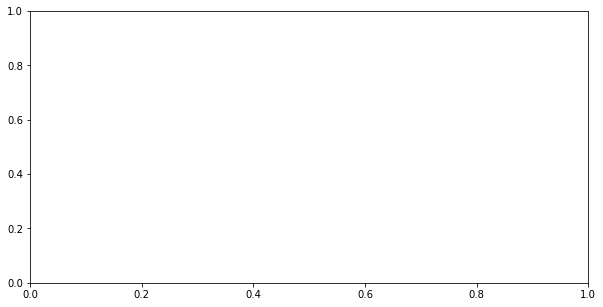

In [4]:
fig = plt.figure(figsize=(10, 5))
data = np.exp(np.array(program_1['logZ']))
plt.plot(range(len(data)), data, label='Evidence')
plt.title('Program 1: Evidence vs log10(number of particles)')
plt.xlabel('log10(number of particles)')
plt.ylabel('Evidence')
plt.grid()
plt.legend()
plt.show()
fig.savefig('Figures/Evidence_1.png')

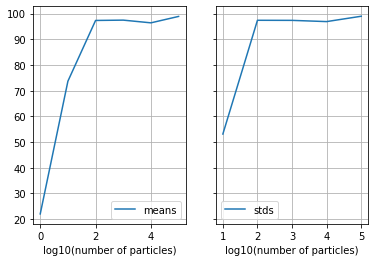

In [6]:
means = [torch.stack(t).double().mean() for t in program_1['particles']]
stds = [torch.stack(t).double().std() for t in program_1['particles']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(len(means)), means, label='means')
# ax1.title('Program 1: Means of particles')
ax1.set_xlabel('log10(number of particles)')
ax1.grid()
ax1.legend()

ax2.plot(range(len(stds)), stds, label='stds')
# ax1.title('Program 1: Std of particles')
ax2.set_xlabel('log10(number of particles)')
ax2.grid()
ax2.legend()
plt.show()

f.savefig('Figures/Mean-Std_1.png')

In [7]:
print(means)


[tensor(22., dtype=torch.float64), tensor(73.7000, dtype=torch.float64), tensor(97.3500, dtype=torch.float64), tensor(97.4740, dtype=torch.float64), tensor(96.4183, dtype=torch.float64), tensor(98.9192, dtype=torch.float64)]


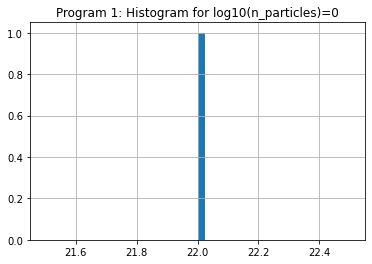

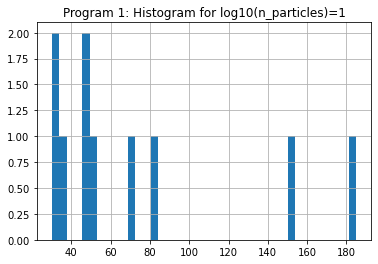

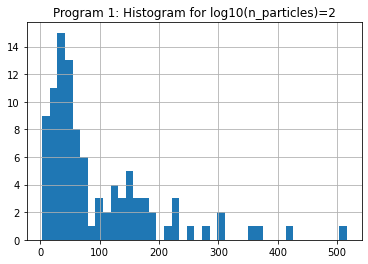

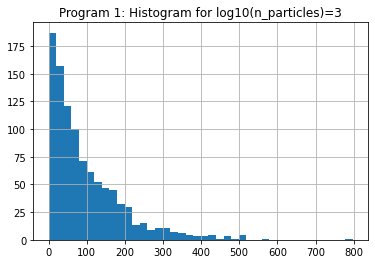

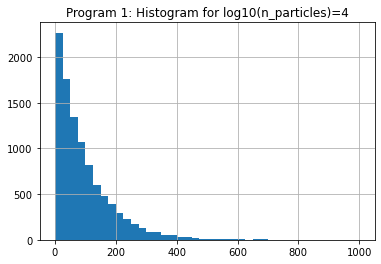

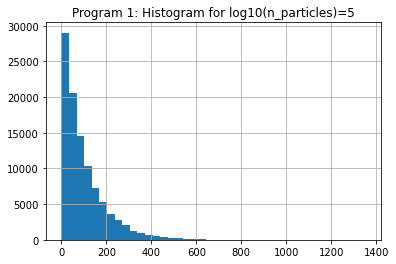

In [8]:
for i in range(len(program_1['particles'])):
    fig = plt.figure()
    plt.hist(torch.stack(program_1['particles'][i]).numpy(), bins=40)
    plt.title('Program 1: Histogram for log10(n_particles)='+str(i))
    plt.grid()
    plt.show()
    fig.savefig('Figures/Histogram_1_'+str(i)+'.png')

In [2]:
with open('/Users/aliseyfi/Documents/UBC/Semester3/Probabilistic-Programming/HW/Probabilistic-Programming/Assignment_6/programs/{}.json'.format(2),'r') as f:
    exp = json.load(f)

program_2 = {'logZ' : [],
             'particles' : []}
for particle_counts in [10**i for i in range(6)]:
    print('particle counts', particle_counts)
    logZ, particles = SMC(particle_counts, exp)
    program_2['logZ'].append(logZ)
    program_2['particles'].append(particles)

particle counts 1
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-15.8194)]
In SMC step 2, Zs:  [tensor(-15.8194), tensor(-19.8844)]
particle counts 10
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-7.5819)]
In SMC step 2, Zs:  [tensor(-7.5819), tensor(-8.3997)]
particle counts 100
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-5.5197)]
In SMC step 2, Zs:  [tensor(-5.5197), tensor(-3.5187)]
particle counts 1000
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-5.2605)]
In SMC step 2, Zs:  [tensor(-5.2605), tensor(-2.7124)]
particle counts 10000
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-5.3650)]
In SMC step 2, Zs:  [tensor(-5.3650), tensor(-2.8658)]
particle counts 100000
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-5.3903)]
In SMC step 2, Zs:  [tensor(-5.3903), tensor(-2.8435)]


In [4]:
np.array(program_2['logZ'])

array([-35.703857, -15.981676,  -9.038419,  -7.972905,  -8.23083 ,
        -8.233838], dtype=float32)

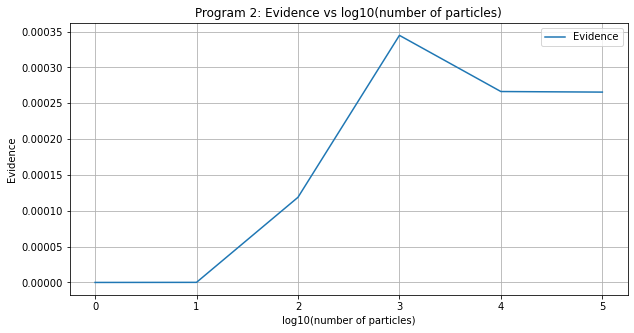

In [6]:
fig = plt.figure(figsize=(10, 5))
data = np.exp(np.array(program_2['logZ']))
plt.plot(range(len(data)), data, label='Evidence')
plt.title('Program 2: Evidence vs log10(number of particles)')
plt.xlabel('log10(number of particles)')
plt.ylabel('Evidence')
plt.grid()
plt.legend()
plt.show()
fig.savefig('Figures/Evidence_2.png')

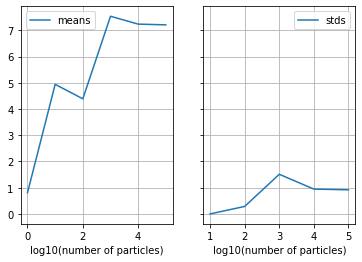

In [11]:
means_2 = [torch.stack(t).double().mean() for t in program_2['particles']]
stds_2 = [torch.stack(t).double().std() for t in program_2['particles']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(len(means_2)), means_2, label='means')
ax1.set_xlabel('log10(number of particles)')
ax1.grid()
ax1.legend()

ax2.plot(range(len(stds_2)), stds_2, label='stds')
ax2.set_xlabel('log10(number of particles)')
ax2.grid()
ax2.legend()
plt.show()

f.savefig('Figures/Mean-Std_2.png')

In [12]:
means_2

[tensor(0.8076, dtype=torch.float64),
 tensor(4.9418, dtype=torch.float64),
 tensor(4.3897, dtype=torch.float64),
 tensor(7.5386, dtype=torch.float64),
 tensor(7.2384, dtype=torch.float64),
 tensor(7.2103, dtype=torch.float64)]

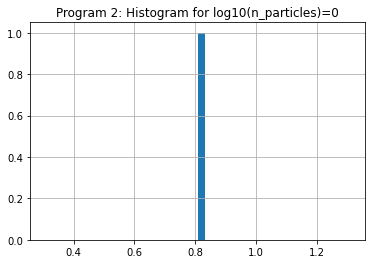

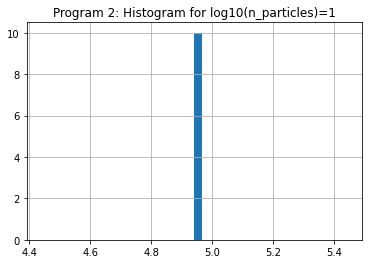

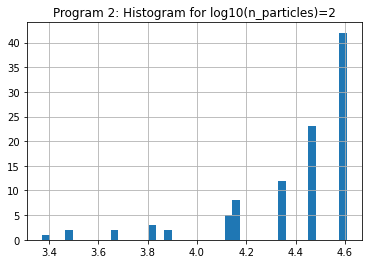

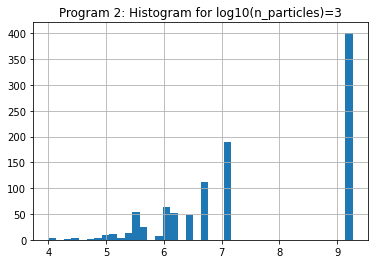

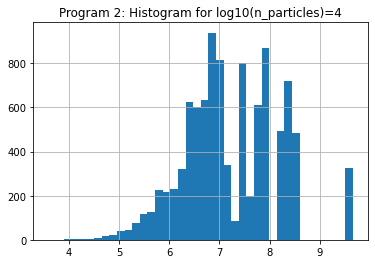

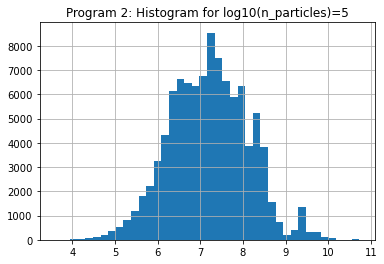

In [14]:
for i in range(len(program_2['particles'])):
    fig = plt.figure()
    plt.hist(torch.stack(program_2['particles'][i]).numpy(), bins=40)
    plt.title('Program 2: Histogram for log10(n_particles)='+str(i))
    plt.grid()
    plt.show()
    fig.savefig('Figures/Histogram_2_'+str(i)+'.png')

In [12]:
with open('/Users/aliseyfi/Documents/UBC/Semester3/Probabilistic-Programming/HW/Probabilistic-Programming/Assignment_6/programs/{}.json'.format(3),'r') as f:
    exp = json.load(f)

program_3 = {'logZ' : [],
             'particles' : []}
for particle_counts in [10**i for i in range(5)]:
    print('particle counts', particle_counts)
    logZ, particles = SMC(particle_counts, exp)
    program_3['logZ'].append(logZ)
    program_3['particles'].append(particles)

particle counts 1
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-0.9239)]
In SMC step 2, Zs:  [tensor(-0.9239), tensor(-2.1629)]
In SMC step 3, Zs:  [tensor(-0.9239), tensor(-2.1629), tensor(-3.3268)]
In SMC step 4, Zs:  [tensor(-0.9239), tensor(-2.1629), tensor(-3.3268), tensor(-4.2458)]
In SMC step 5, Zs:  [tensor(-0.9239), tensor(-2.1629), tensor(-3.3268), tensor(-4.2458), tensor(-5.1650)]
In SMC step 6, Zs:  [tensor(-0.9239), tensor(-2.1629), tensor(-3.3268), tensor(-4.2458), tensor(-5.1650), tensor(-18.5839)]
In SMC step 7, Zs:  [tensor(-0.9239), tensor(-2.1629), tensor(-3.3268), tensor(-4.2458), tensor(-5.1650), tensor(-18.5839), tensor(-21.5029)]
In SMC step 8, Zs:  [tensor(-0.9239), tensor(-2.1629), tensor(-3.3268), tensor(-4.2458), tensor(-5.1650), tensor(-18.5839), tensor(-21.5029), tensor(-22.4268)]
In SMC step 9, Zs:  [tensor(-0.9239), tensor(-2.1629), tensor(-3.3268), tensor(-4.2458), tensor(-5.1650), tensor(-18.5839), tensor(-21.5029), tensor(-22.4268), tensor(-23.34

In [15]:
np.array(program_3['logZ'])[:,-1]

array([-48.953033, -48.209946, -47.03483 , -44.452667, -44.518654],
      dtype=float32)

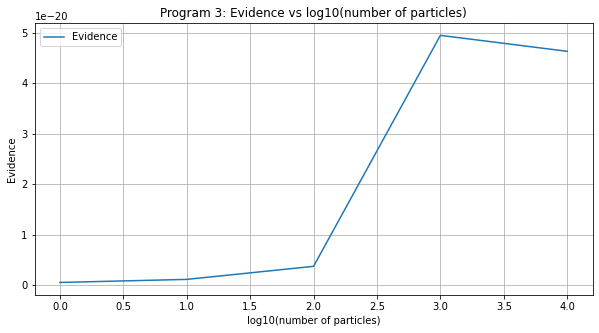

In [16]:
fig = plt.figure(figsize=(10, 5))
data = np.exp(np.array(program_3['logZ'])[:,-1])
plt.plot(range(len(data)), data, label='Evidence')
plt.title('Program 3: Evidence vs log10(number of particles)')
plt.xlabel('log10(number of particles)')
plt.ylabel('Evidence')
plt.grid()
plt.legend()
plt.show()
fig.savefig('Figures/Evidence_3.png')

No handles with labels found to put in legend.


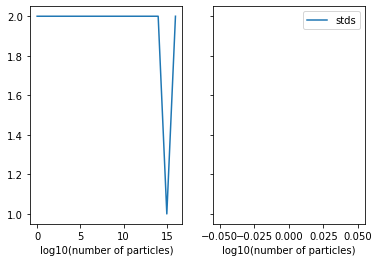

No handles with labels found to put in legend.


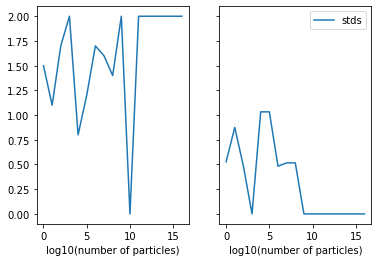

No handles with labels found to put in legend.


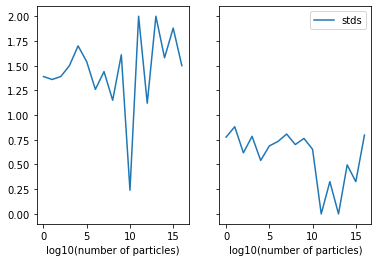

No handles with labels found to put in legend.


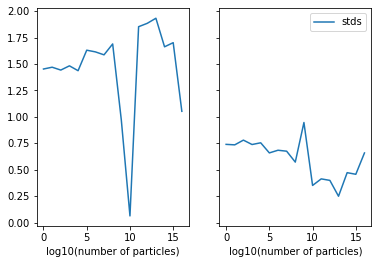

No handles with labels found to put in legend.


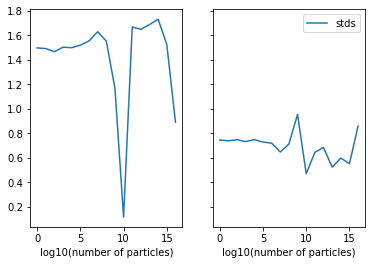

In [17]:
for i in range(len(program_3['particles'])):
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    means_3 = torch.vstack(program_3['particles'][i]).double().mean(axis=0)
    stds_3 = torch.vstack(program_3['particles'][i]).double().std(axis=0)
    ax1.plot(range(len(means_3)), means_3, label='means')
    ax1.set_xlabel('log10(number of particles)')
    plt.grid()
    plt.legend()

    ax2.plot(range(len(stds_3)), stds_3, label='stds')
    ax2.set_xlabel('log10(number of particles)')
    ax2.grid()
    ax2.legend()

    plt.show()

    f.savefig('Figures/Mean-Std_3_'+str(i)+'.png')

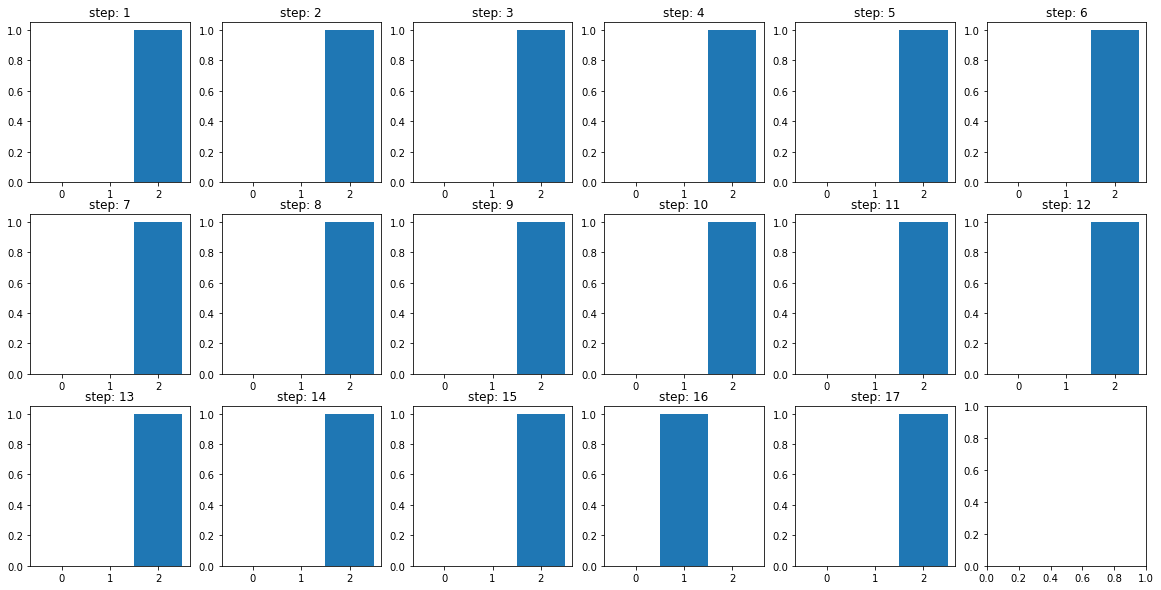

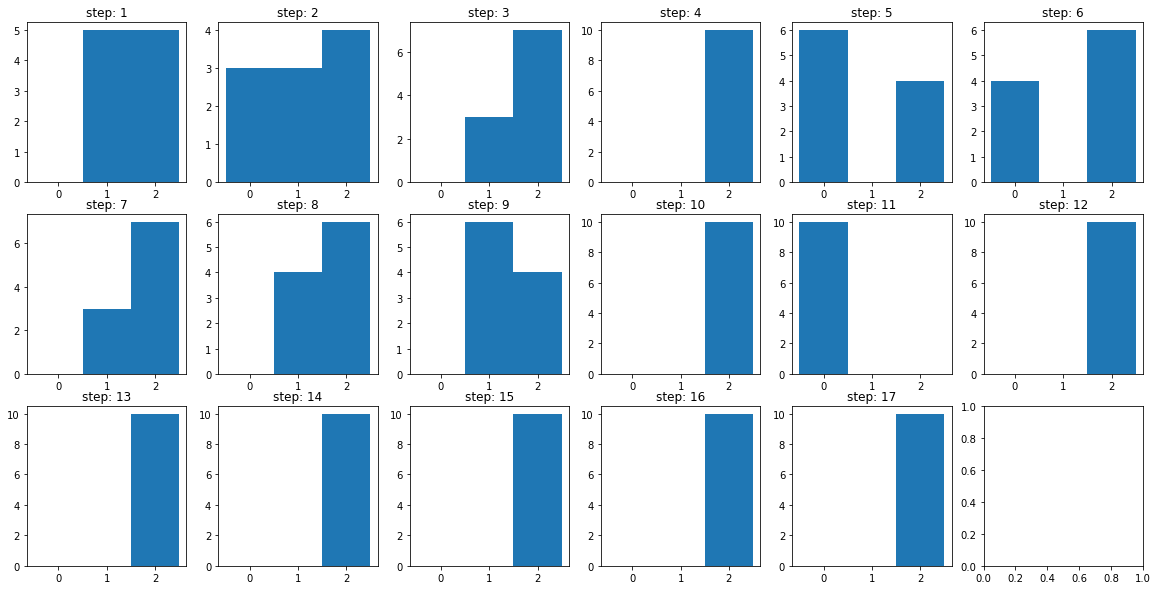

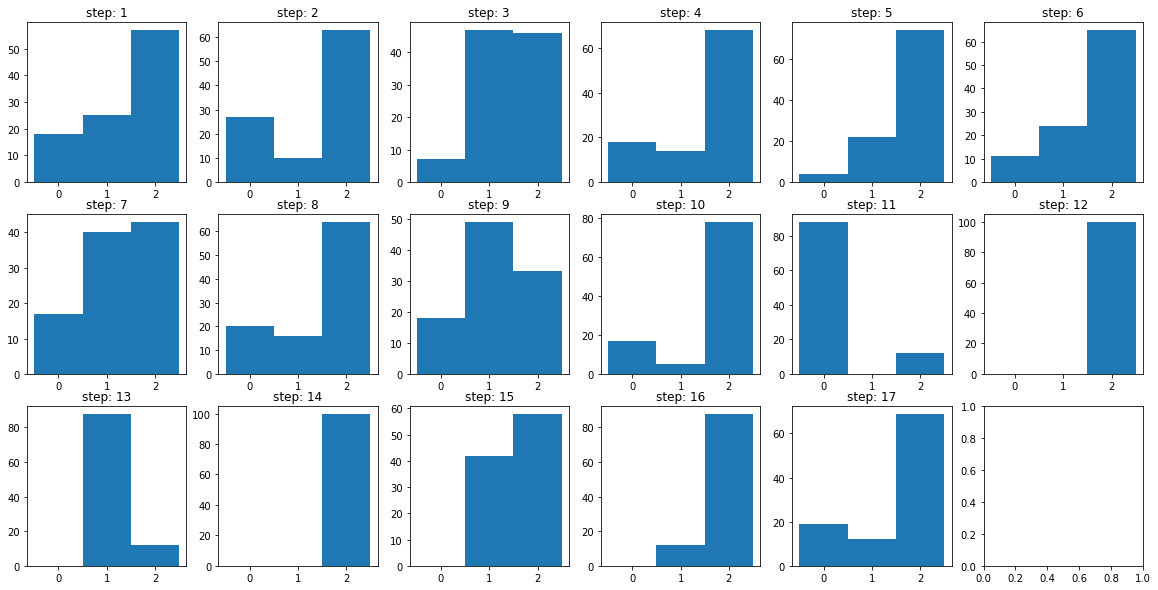

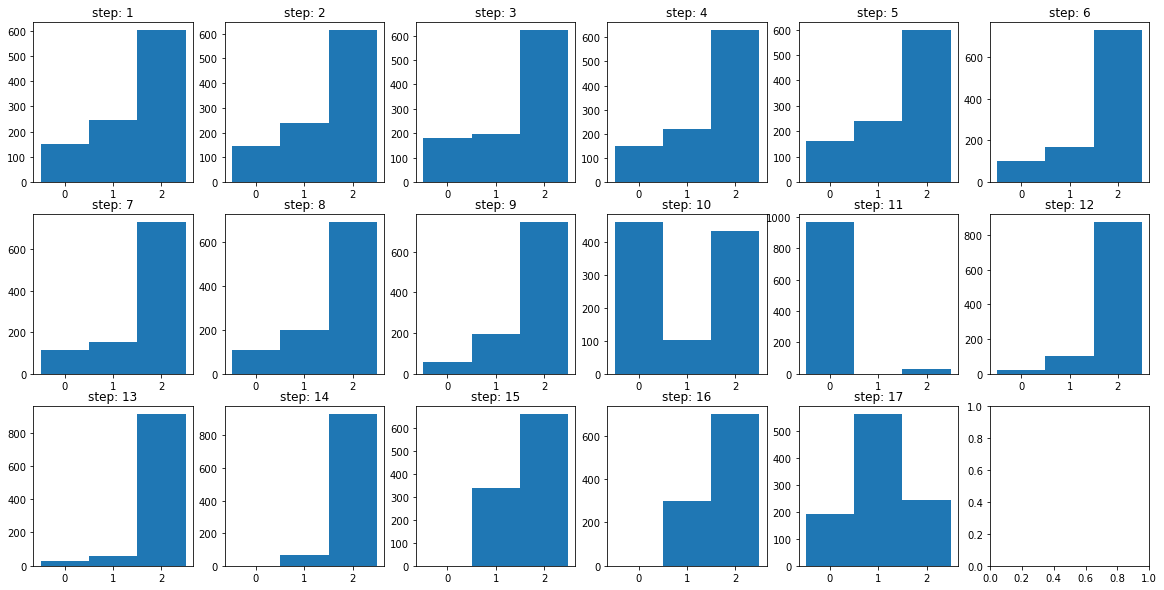

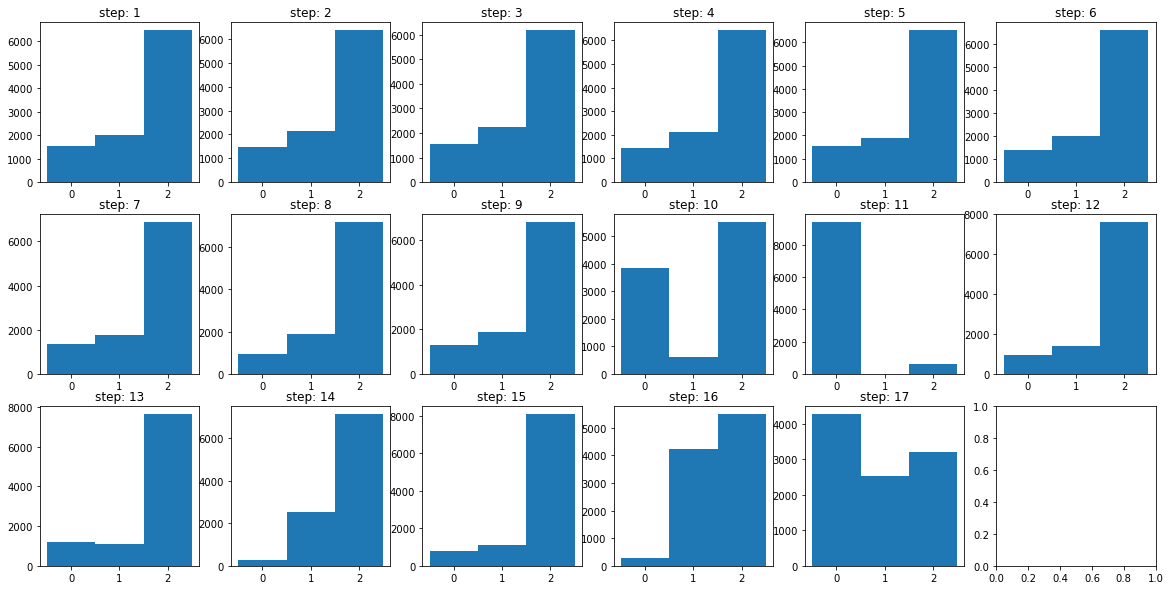

In [18]:
for i in range(len(program_3['particles'])):
    plt.subplots(3,6, figsize=(20,10))
    for j in range(17):
        plt.subplot(3,6,j+1)
        plt.hist(torch.stack(program_3['particles'][i])[:,j].numpy(), bins = [-0.5,0.5,1.5,2.5])
        plt.title("step: "+str(j+1))
    plt.savefig('Figures/Histogram_3_'+str(i)+'.png')

In [7]:
with open('/Users/aliseyfi/Documents/UBC/Semester3/Probabilistic-Programming/HW/Probabilistic-Programming/Assignment_6/programs/{}.json'.format(4),'r') as f:
    exp = json.load(f)

program_4 = {'logZ' : [],
             'particles' : []}
for particle_counts in [10**i for i in range(6)]:
    print('particle counts', particle_counts)
    logZ, particles = SMC(particle_counts, exp)
    program_4['logZ'].append(logZ)
    program_4['particles'].append(particles)

particle counts 1
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-15.5669)]
In SMC step 2, Zs:  [tensor(-15.5669), tensor(-19.5986)]
particle counts 10
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-7.2100)]
In SMC step 2, Zs:  [tensor(-7.2100), tensor(-7.8530)]
particle counts 100
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-4.8272)]
In SMC step 2, Zs:  [tensor(-4.8272), tensor(-2.7976)]
particle counts 1000
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-5.2236)]
In SMC step 2, Zs:  [tensor(-5.2236), tensor(-2.7674)]
particle counts 10000
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-5.4466)]
In SMC step 2, Zs:  [tensor(-5.4466), tensor(-2.9548)]
particle counts 100000
In SMC step 0, Zs:  []
In SMC step 1, Zs:  [tensor(-5.3779)]
In SMC step 2, Zs:  [tensor(-5.3779), tensor(-2.8498)]


In [8]:
np.array(program_4['logZ'])

array([-35.165577 , -15.062956 ,  -7.6248198,  -7.991002 ,  -8.401378 ,
        -8.227647 ], dtype=float32)

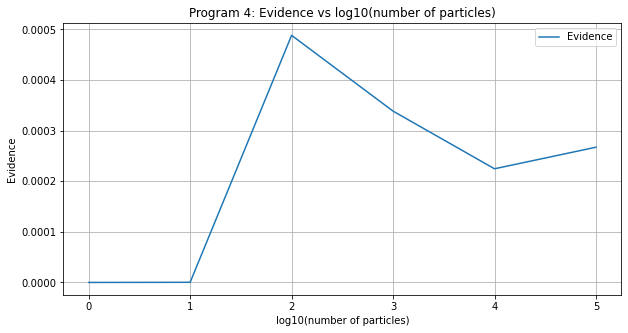

In [9]:
fig = plt.figure(figsize=(10, 5))
data = np.exp(np.array(program_4['logZ']))
plt.plot(range(len(data)), data, label='Evidence')
plt.title('Program 4: Evidence vs log10(number of particles)')
plt.xlabel('log10(number of particles)')
plt.ylabel('Evidence')
plt.grid()
plt.legend()
plt.show()
fig.savefig('Figures/Evidence_4.png')

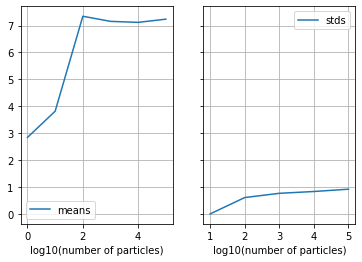

In [17]:
means_4 = [torch.stack(t).double().mean() for t in program_4['particles']]
stds_4 = [torch.stack(t).double().std() for t in program_4['particles']]
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(range(len(means_4)), means_4, label='means')
ax1.set_xlabel('log10(number of particles)')
ax1.grid()
ax1.legend()

ax2.plot(range(len(stds_4)), stds_4, label='stds')
ax2.set_xlabel('log10(number of particles)')
ax2.grid()
ax2.legend()
plt.show()

f.savefig('Figures/Mean-Std_4.png')

In [18]:
means_4

[tensor(2.8495, dtype=torch.float64),
 tensor(3.8222, dtype=torch.float64),
 tensor(7.3450, dtype=torch.float64),
 tensor(7.1552, dtype=torch.float64),
 tensor(7.1179, dtype=torch.float64),
 tensor(7.2363, dtype=torch.float64)]

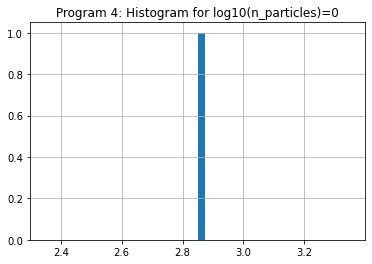

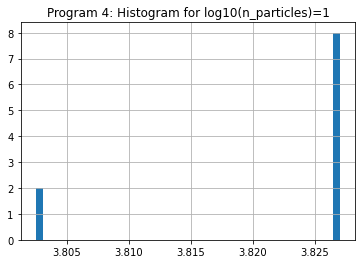

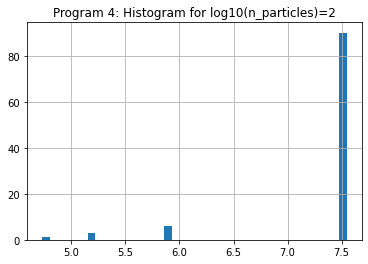

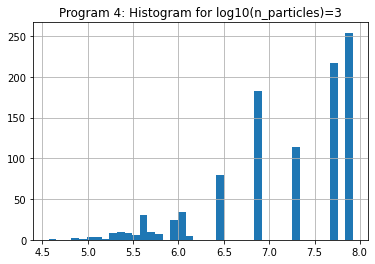

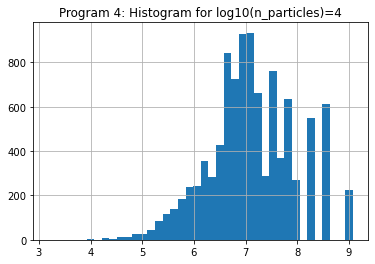

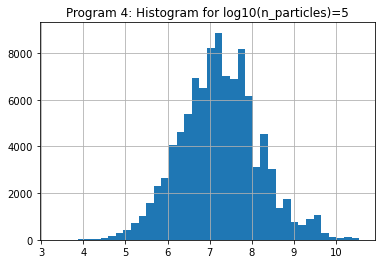

In [19]:
for i in range(len(program_4['particles'])):
    fig = plt.figure()
    plt.hist(torch.stack(program_4['particles'][i]).numpy(), bins=40)
    plt.title('Program 4: Histogram for log10(n_particles)='+str(i))
    plt.grid()
    plt.show()
    fig.savefig('Figures/Histogram_4_'+str(i)+'.png')